# Assignment No:1

# Countries of the World EDA

## Abstract:

Main motive of this data analysis is to study factors affecting a country's GDP per capita. 
Here we have analyzed data of the 227 countries 
like population density, coast line, Literacy, Birthrate, Death rate etc which are responsible factors for evaluating the GDPs of corresponding countries. 
This study would be very helpful in order to make a predictive model of model countries GDP using linear regression.
The hope is to find independent variables with a strong linear relation to the dependent variable GDP ($ per capita).

## Importing required Libraries 
Here we import all required libraries to implement the required codes.



In [109]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


## Dataset Import:
We have to import dataset saved in the CSV format to analyse the data. This dataset is available on Kaggle.


In [76]:
# importing the dataset from Excel file
df=pd.read_csv("countries of the world.csv", decimal = ',')

### Head Function Demonstration.
This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [77]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Demonstration of Describe Function 

Describe() function is used to view some basic statistical details like percentile, mean, std etc. of a data frame 
or a series of numeric values.
When this method is applied to a series of string, it returns a different output which is shown in the examples below.

In [78]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Sort countries by GDP per capita
Sort_values() function helps us to sort the elements according to our convenience.We have arranged GDP ($ per capita) in ascending order and we have considered first twenty countries.

In [79]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


##  Use of Subplots: 
We are using following code to plot barplot showing the distribution of GDP( countries Vs $ per capita ) of first 33 countries as well as last 33 countries. 

##### Graphical (Barchat) representation of GDP($ per capita) for best 33 countries.

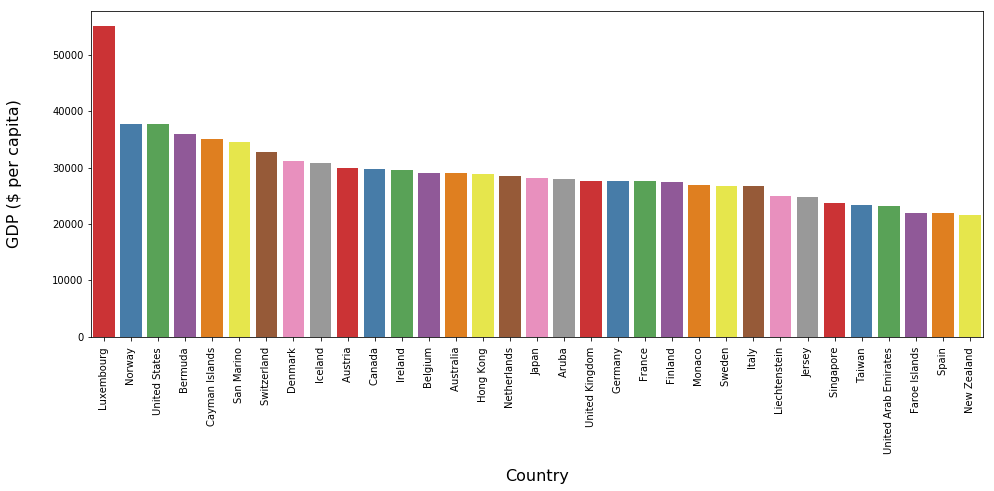

In [80]:

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

##### Graphical (Barchat) representation of GDP($ per capita) for last 33 countries.

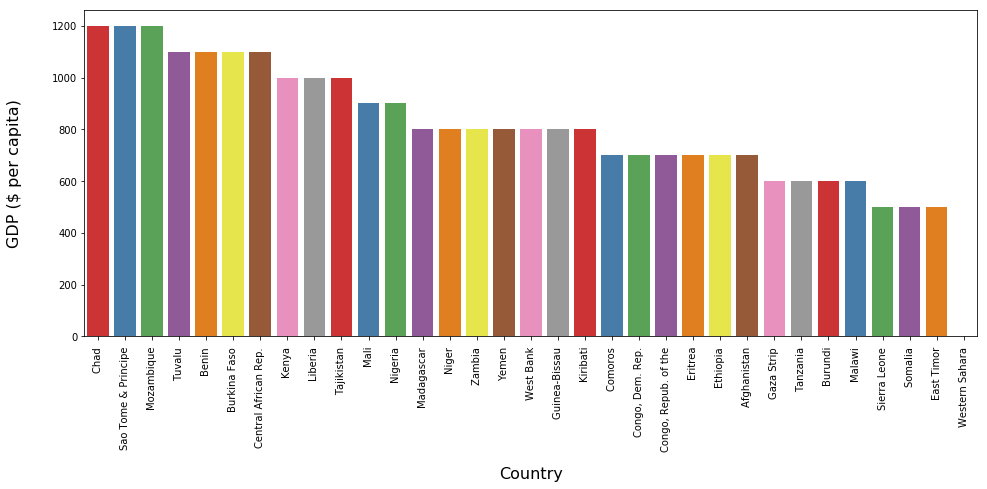

In [81]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

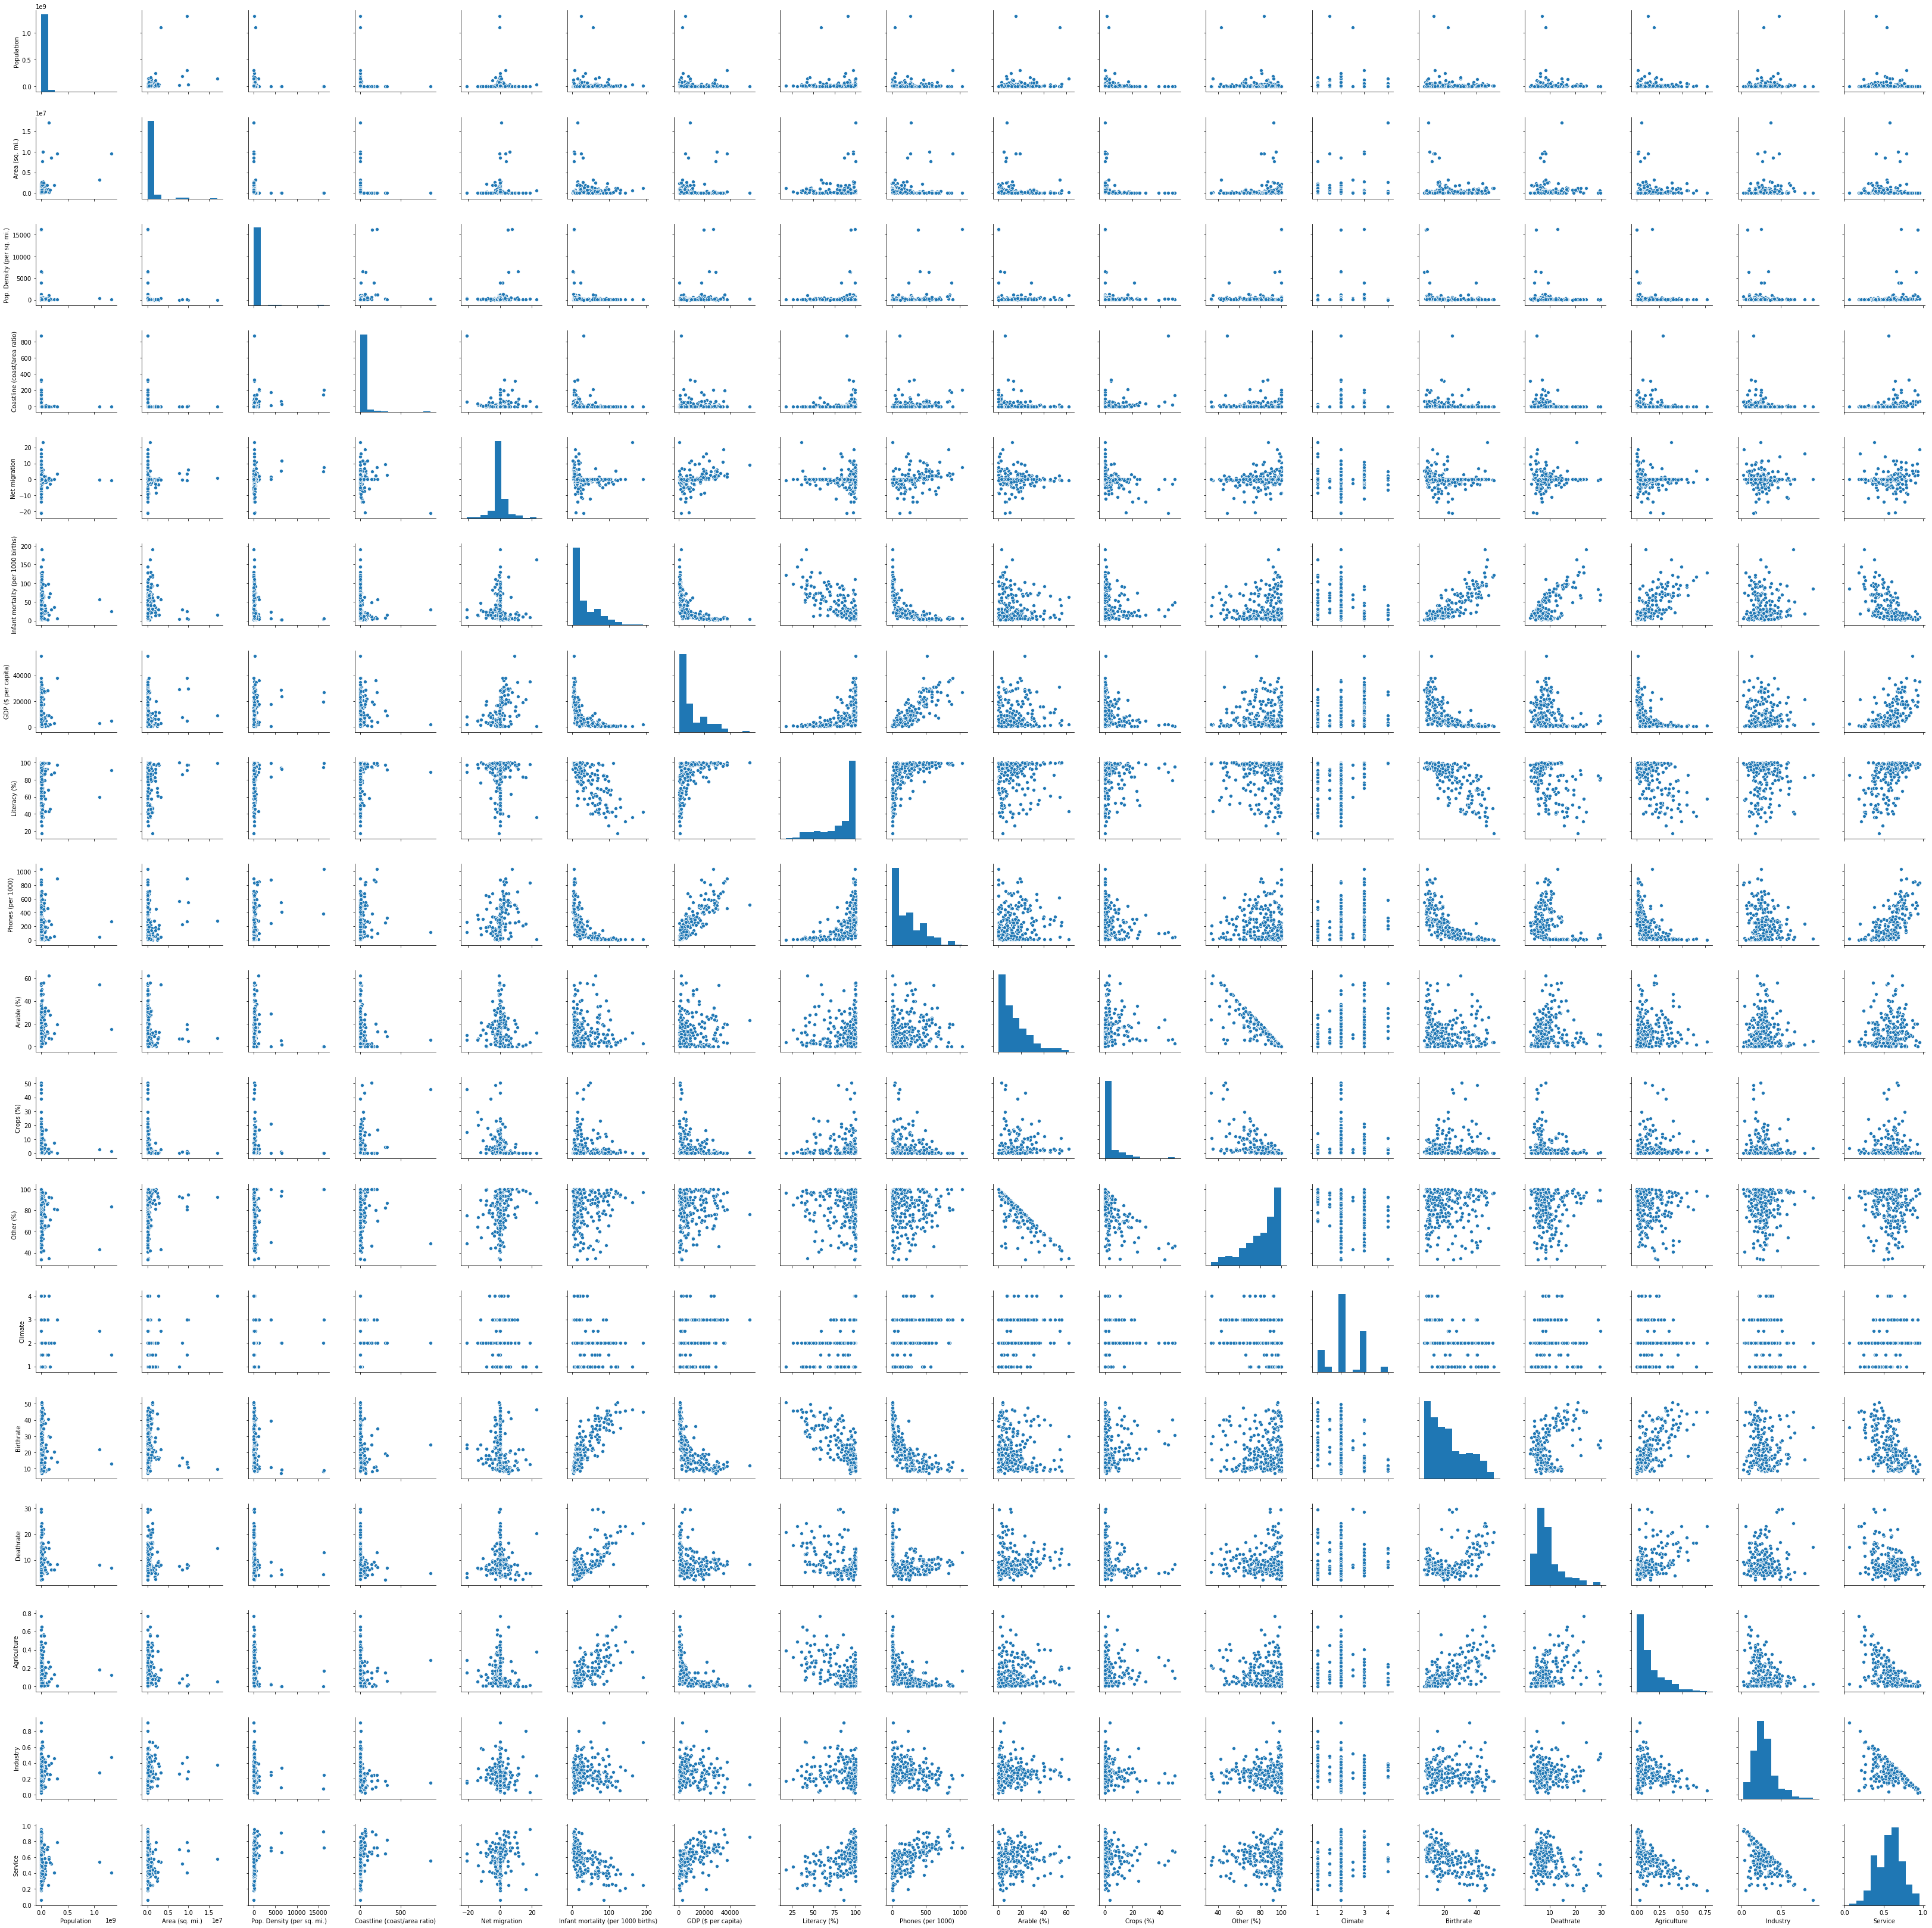

In [110]:
sns.pairplot(df)

From above pairplot we can find out if country's GDP is linearly dependent or not and let us know the feature which is linearly dependent.

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


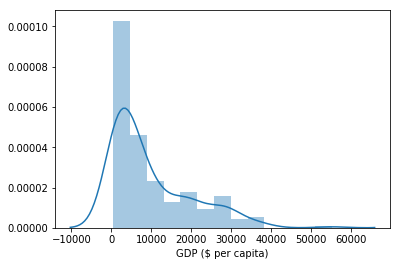

In [117]:
sns.distplot(df['GDP ($ per capita)'])

We can see that GDP per capita is not linearly distributed.

###  Count of total missing values (Null values) in data set

Now we are going to find total missing values of the dataset for the selected variables and their percentages.

In [82]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


#### Check for null values:
This will give boolean value for whether null values are present or not.

In [83]:
# Checking for null values
df.isnull().values.any() 

True

####  Sum of null values for each variable.

In [84]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

#### Sum of the total missing values(null values) in data set.

In [85]:
df.isnull().sum().sum()

110

In [86]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

# Region wise distribution

In [87]:
np.random.seed(sum(map(ord, "distributions")))

In [88]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720


## Boxplot Demonstration

It gives a nice summary of one or several numeric variables. 
The line that divides the box into 2 parts represents the median of the data.The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers

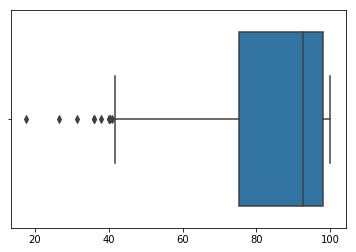

In [89]:
 
sns.boxplot(np.array(df['Literacy (%)']))

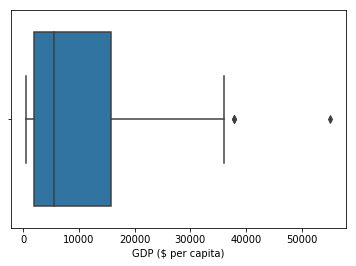

In [90]:
sns.boxplot(df['GDP ($ per capita)'])

### Pairwise correlation of columns

In [91]:
## Compute pairwise correlation of columns
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000122,0.024488,-0.038915,-0.051610,-0.029235,0.188337,-0.059617,-0.121118,-0.024329,-0.044151,-0.025974,0.004867,0.105732,-0.087356
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047537,-0.005120,0.072460,0.025954,0.055026,-0.079270,-0.142234,0.137956,0.031986,-0.064822,0.042418,-0.048821,0.127401,-0.057227
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178088,-0.142741,0.196063,0.098487,0.280818,-0.080857,-0.032460,0.082066,0.061828,-0.157909,-0.067910,-0.110235,-0.116734,0.229223
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.133947,-0.138223,0.049561,0.133112,0.153204,-0.120760,0.338889,-0.078312,-0.006490,-0.074021,-0.162705,-0.036301,-0.214819,0.210201
Net migration,0.000122,0.047537,0.178088,-0.133947,1.000000,-0.024876,0.382029,-0.015620,0.239160,-0.059334,-0.344337,0.225740,0.027798,-0.064947,0.033575,-0.107105,-0.019156,0.110103
Infant mortality (per 1000 births),0.024488,-0.005120,-0.142741,-0.138223,-0.024876,1.000000,-0.595432,-0.758702,-0.666699,-0.113607,-0.070197,0.128063,-0.373921,0.844442,0.655891,0.706734,0.028859,-0.640007
GDP ($ per capita),-0.038915,0.072460,0.196063,0.049561,0.382029,-0.595432,1.000000,0.508839,0.832364,0.023937,-0.218093,0.093737,0.361704,-0.643199,-0.196322,-0.585987,-0.034993,0.553994
Literacy (%),-0.051610,0.025954,0.098487,0.133112,-0.015620,-0.758702,0.508839,1.000000,0.587440,0.085269,0.038372,-0.088522,0.425807,-0.776946,-0.376756,-0.594062,0.019528,0.505618
Phones (per 1000),-0.029235,0.055026,0.280818,0.153204,0.239160,-0.666699,0.832364,0.587440,1.000000,0.068853,-0.150700,0.022293,0.436692,-0.721099,-0.253033,-0.599405,-0.158178,0.670933
Arable (%),0.188337,-0.079270,-0.080857,-0.120760,-0.059334,-0.113607,0.023937,0.085269,0.068853,1.000000,0.094614,-0.856770,0.377806,-0.195100,0.060153,-0.023227,-0.048444,0.066550


### Heatmap representation.
A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

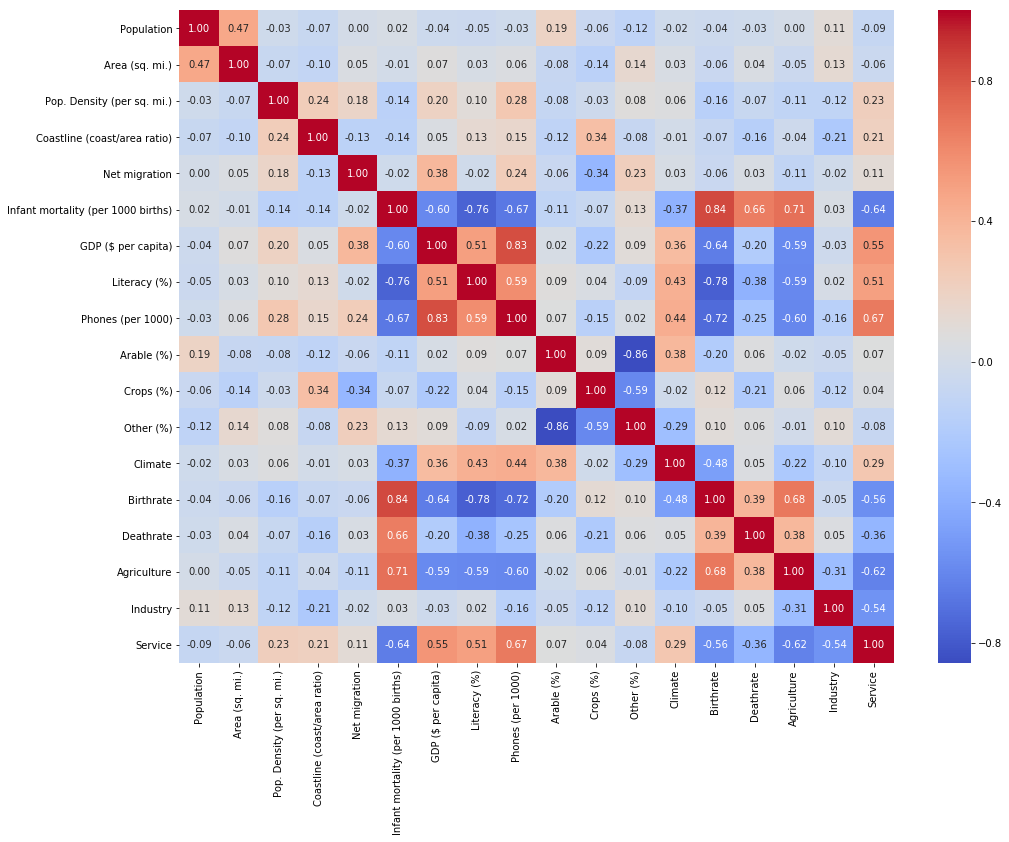

In [92]:
# Heatmap 
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

'literacy','phones_per_1000','infant_mortality_per_1000_births','birthrate','deathrate' have higest absolute value correlation with 'gdp_$_per_capita'

#### Selection of attributes for showing relation.

In [93]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate']]

#### Plot for pairwise correlation  of the chosen attributes on heat map

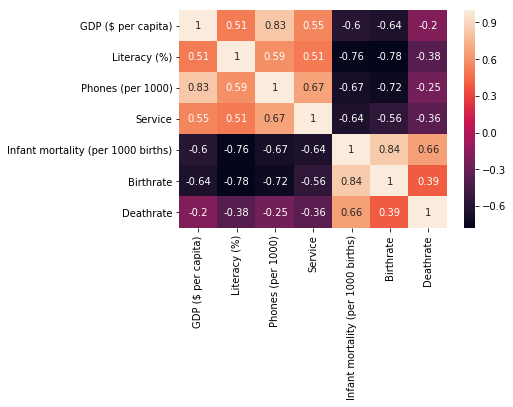

In [94]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

##  Subplots plotting 

Subplots are required when we want to show two or more plots in same figure. 
Please find below subplots for the following
1)GDP(per capita) and Phones (per 1000)

2)GDP( per capita) and Birthrate 

3)GDP(per capita) and Infant Mortility 

4)GDP(per capita) and Agriculture 

5)GDP(per capita) and Services 

6)GDP(per capita) and Literacy 

7)GDP(per capita) and Net migration 

8)GDP(per capita) and Crops. 

9)GDP(per capita) and Deathrate. 

So we have these 9 factors which are responsible for influencing the GDP and their subplots and their coorelations factors calculated at the top.


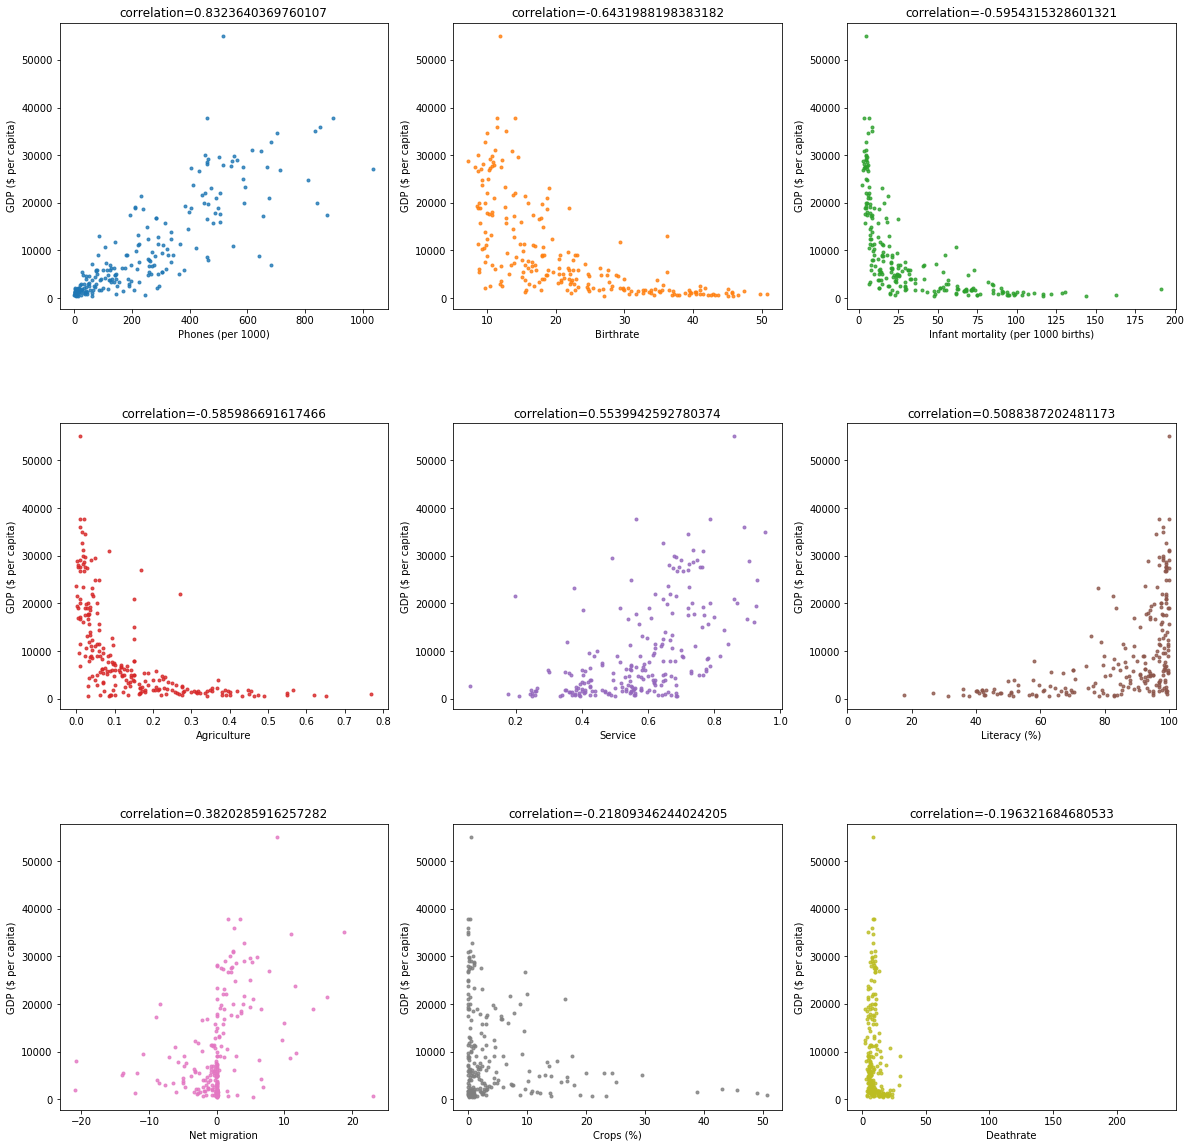

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [96]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


###  Pairplot:
We have plotted pairplots for GDP per capita, Phones per 1000 and Services from the given data.  

In [97]:

x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]

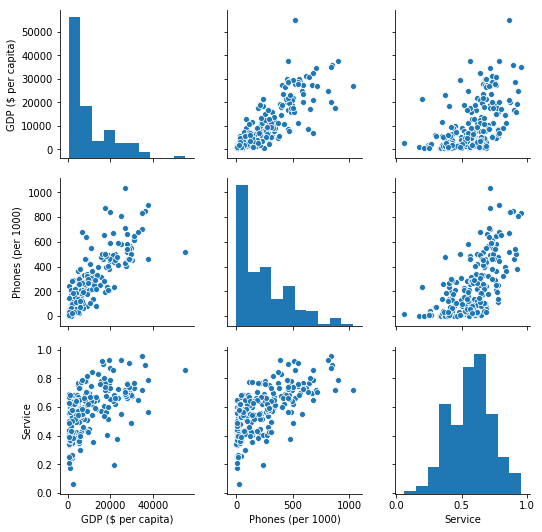

In [98]:
sns.pairplot(x)

### Computation of pairwise correlation of GDP per capita, Phones per 1000, Services

In [99]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.832364,0.553994
Phones (per 1000),0.832364,1.000000,0.670933
Service,0.553994,0.670933,1.000000


In [100]:
df['GDP ($ per capita)']

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     6000.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

In [101]:
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]

In [102]:
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     6000.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

#### Checking distribution of literacy of the world

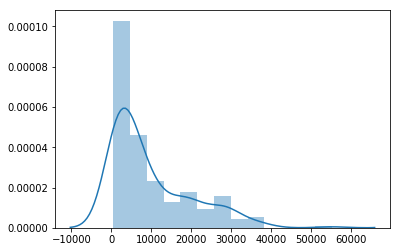

In [103]:

sns.distplot(np.array(gdp_no_nan))

#### Checking distribution of Phones per 1000 of the world

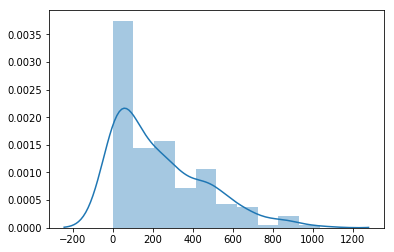

In [104]:

sns.distplot(np.array(df['Phones (per 1000)']))

#### Checking distribution of services of the world

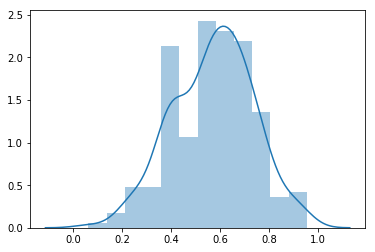

In [105]:
sns.distplot(np.array(df['Service']))

#### Boxplot for GDP ($ per capita) 

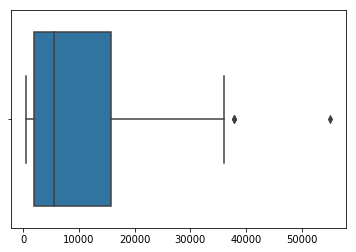

In [106]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

#### Boxplot for Phones ( per 1000) 

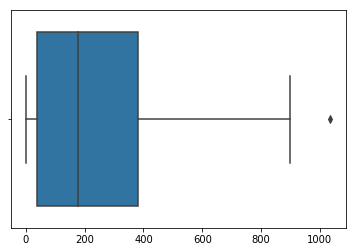

In [107]:
sns.boxplot(np.array(df['Phones (per 1000)']))

#### Boxplot for Services  

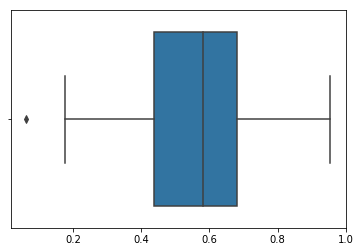

In [108]:
sns.boxplot(np.array(df['Service']))

## Conclusion

1)	If the total population increased, Gross Domestic Product (GDP) growth will change either up or down. This is because a large number of births which affect the total population to increase will help in the development of the national economy.

2)	 Indirectly, we also can see that the independent variable factors that affect the total population are one of the causes of the increase or decrease in the Gross Domestic Product (GDP). 

3)	From the correlation plotted (heatmaps) between the attributes,factors majorly affecting the GDP are Phones, Services, Infant mortality, birthdate, deathrate. Also we can conclude that Phones and Services are variables strongly dependent on the GDP ($ per capita). 

4)	Subplots shows us that  attributes like Phones & Services are related to the GDP more linearly, while others are not. Like high Birthrate usually means low GDP per capita, but average GDP in low Birthrate countries can vary a lot. Same goes with the Agriculture too.




## Contributions :

- By own: 20%
- By external source:80% 

##  Citations

1) License: https://opensource.org/licenses/MIT  
2) Author:Marek Source: https://www.kaggle.com/stieranka/predicting-gdp-world-countries/notebook Published: ( March 3) 2018)Version: V1 Accessiblity: Public
3) Author: Fernando Lasso Source: The World Factbook Source:https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html Accessiblity: Public 
4) Source: https://stackoverflow.com/ Accessibility: Public

## License:

Copyright 2019 Nikhil Kashid

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
